In [126]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [128]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

<img src="../public/gradient_descent_summary.png" />

In [129]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

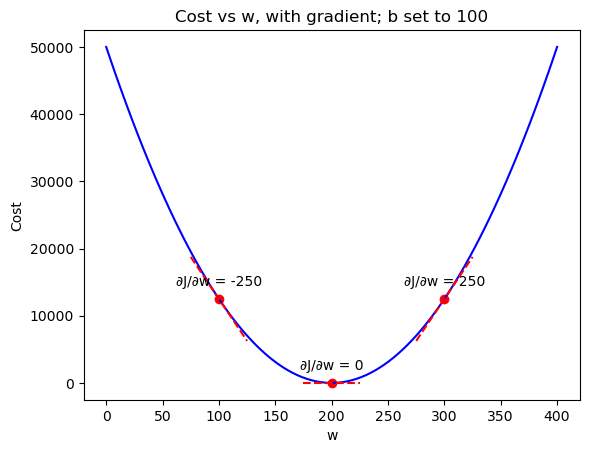

In [130]:
w_range = np.linspace(0, 400, 100)
cost_values = [compute_cost(x_train, y_train, w, 100) for w in w_range]

plt.plot(w_range, cost_values, c="b")

# Annotate gradients at sample points
sample_ws = [100, 200, 300]
for w in sample_ws:
    cost = compute_cost(x_train, y_train, w, 100)
    dj_dw, dj_db = compute_gradient(x_train, y_train, w, 100)
    plt.scatter(w, cost, c="red")
    plt.text(w, cost + 2000, f"∂J/∂w = {int(dj_dw)}", ha="center")
    plt.plot([w - 25, w+25], [cost - dj_dw*25, cost + dj_dw*25], "r--")

plt.xlabel("w")
plt.ylabel("Cost")
plt.title("Cost vs w, with gradient; b set to 100")
plt.show()

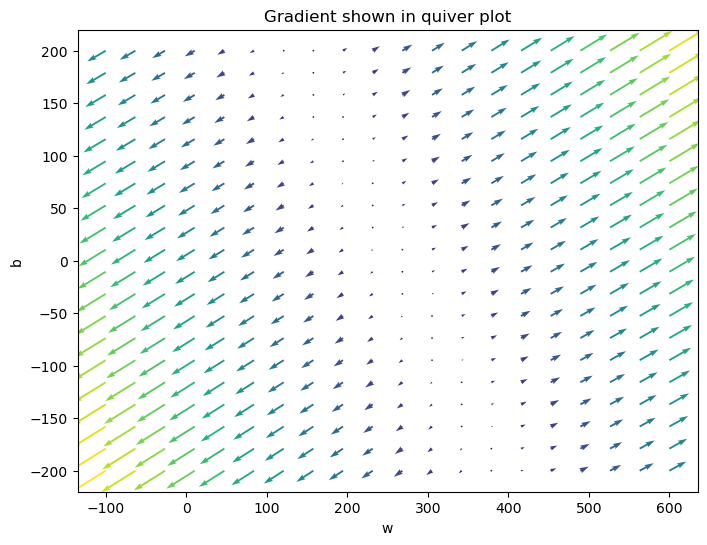

In [131]:
# Create grid of w and b values
w_values = np.linspace(-100, 600, 20)
b_values = np.linspace(-200, 200, 20)

W, B = np.meshgrid(w_values, b_values)

# Compute gradients over the grid
DJ_DW = np.zeros(W.shape)
DJ_DB = np.zeros(B.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dj_dw, dj_db = compute_gradient(x_train, y_train, W[i, j], B[i, j])
        DJ_DW[i, j] = dj_dw
        DJ_DB[i, j] = dj_db

# Quiver plot
plt.figure(figsize=(8,6))
plt.quiver(W, B, DJ_DW, DJ_DB, np.hypot(DJ_DW, DJ_DB), cmap="viridis")
plt.xlabel("w")
plt.ylabel("b")
plt.title("Gradient shown in quiver plot")
plt.show()

In [132]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [133]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


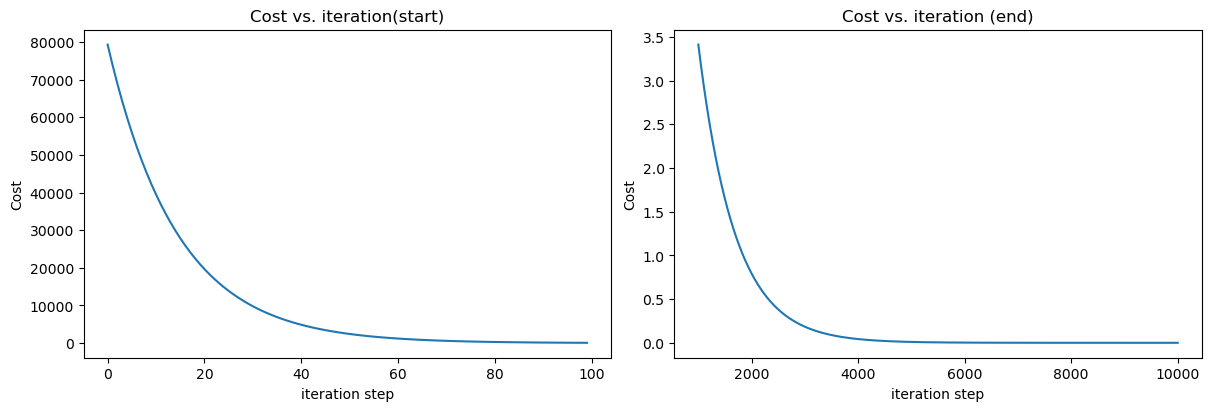

In [134]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [135]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [136]:
def compute_model_output(x, w, b):
    return w * x + b

In [137]:
def form_contour_plot(w, b):
    # Predictions
    y_pred = compute_model_output(x_train, w, b)
    cost = compute_cost(x_train, y_train, w, b)
    
    # Plot setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # LEFT PLOT: Housing Prices with error lines
    ax1.plot(x_train, y_pred, c='b', label='Our Prediction')
    ax1.scatter(x_train, y_train, marker='x', c='r', s=100, label='Actual Value')
    
    # Draw error lines
    m = x_train.shape[0]
    squared_errors = []
    for i in range(m):
        ax1.vlines(x_train[i], y_pred[i], y_train[i], color='purple', linestyle='dotted')
        sq_err = (y_pred[i] - y_train[i])**2
        squared_errors.append(sq_err)
        ax1.text(x_train[i] + 0.05, (y_pred[i] + y_train[i]) / 2,
                 f"{int(sq_err)}", color="purple")
    
    # Show cost expression
    error_text = " + ".join(str(int(e)) for e in squared_errors)
    ax1.text(1, 100,
             f"cost = (1/m)*({error_text}) = {int(cost)}",
             color="purple")
    ax1.set_title("Housing Prices")
    ax1.set_xlabel("Size (1000 sqft)")
    ax1.set_ylabel("Price (in 1000s of dollars)")
    ax1.legend()

    # RIGHT PLOT: Contour of Cost(w,b)
    w_vals = np.linspace(0, 500, 100)
    b_vals = np.linspace(-200, 300, 100)
    J_vals = np.zeros((len(w_vals), len(b_vals)))
    
    for i in range(len(w_vals)):
        for j in range(len(b_vals)):
            J_vals[i, j] = compute_cost(x_train, y_train, w_vals[i], b_vals[j])
    
    W, B = np.meshgrid(w_vals, b_vals)
    ax2.contour(W, B, J_vals.T, levels=np.logspace(2, 5, 20), cmap="rainbow")
    ax2.scatter(w, b, c='b', s=100, marker='o')
    ax2.vlines(w, b_vals.min(), b, color='purple', linestyle='dotted')
    ax2.hlines(b, w_vals.min(), w, color='purple', linestyle='dotted')
    
    ax2.set_title("Cost(w,b)")
    ax2.set_xlabel("w")
    ax2.set_ylabel("b")
    
    plt.show()

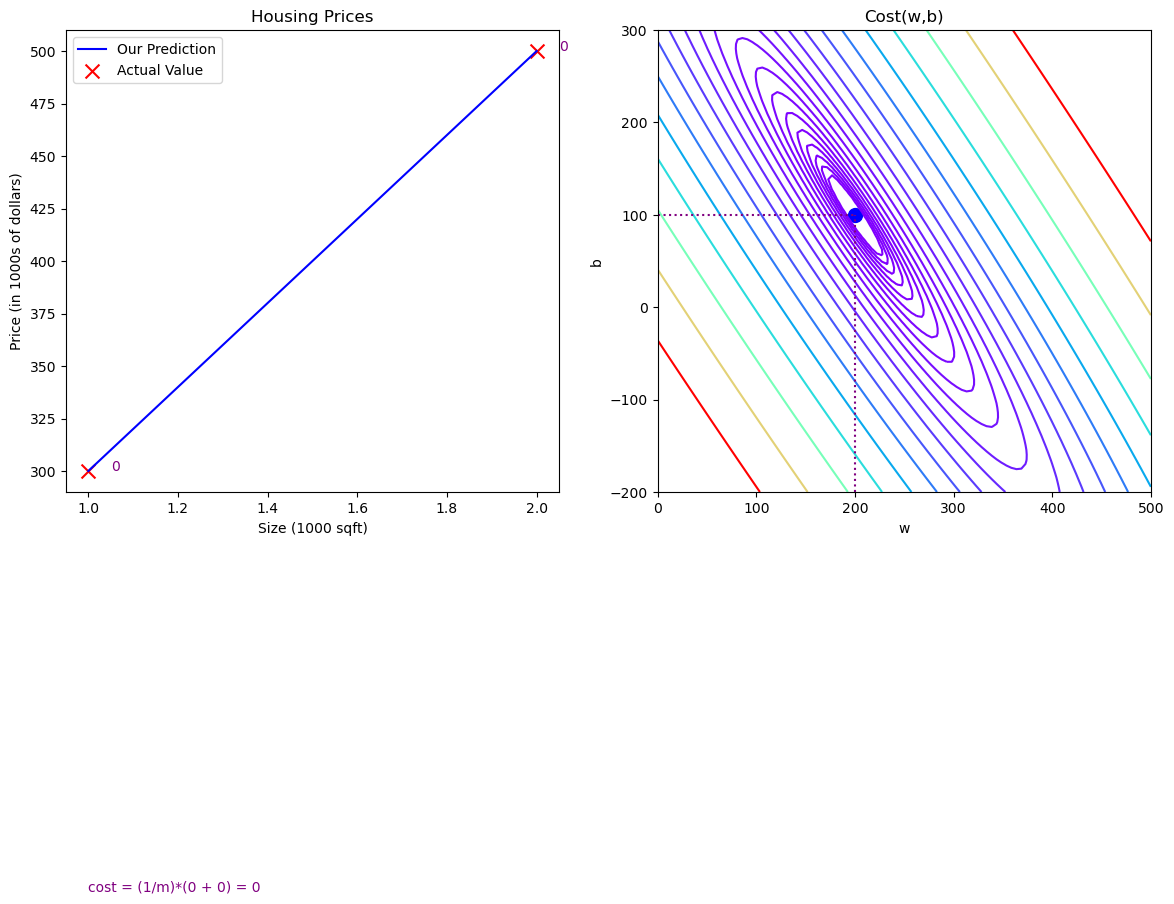

In [138]:
form_contour_plot(w_final, b_final)